In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
if not os.path.isfile("jena_climate_2009_2016.csv"):
    !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
    !unzip jena_climate_2009_2016.csv.zip
    !rm jena_climate_2009_2016.csv.zip

In [3]:
df = pd.read_csv("jena_climate_2009_2016.csv")
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [4]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

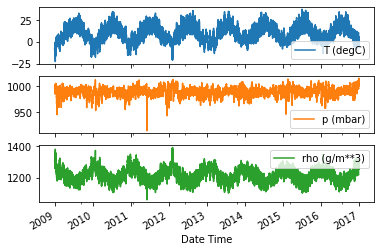

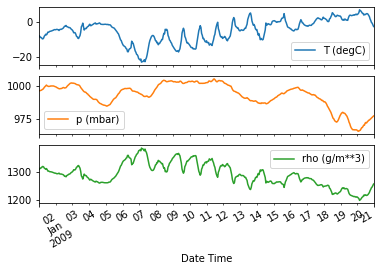

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [8]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

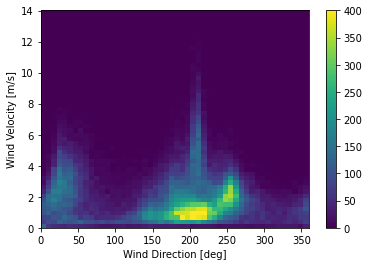

In [9]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [10]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

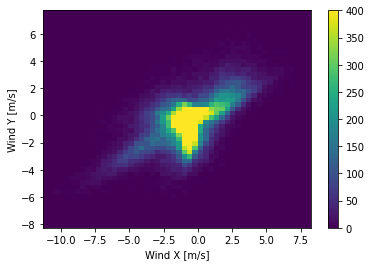

In [11]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [12]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [13]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

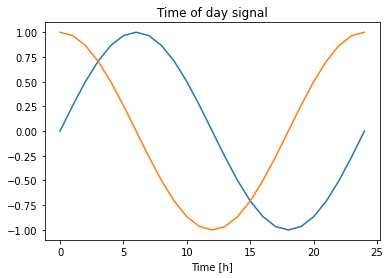

In [14]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


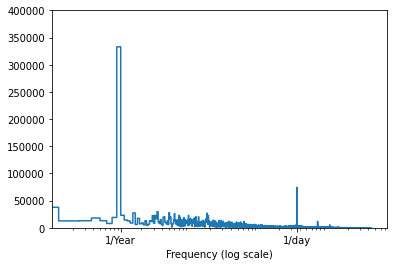

In [15]:
fft = np.fft.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')


In [16]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [17]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

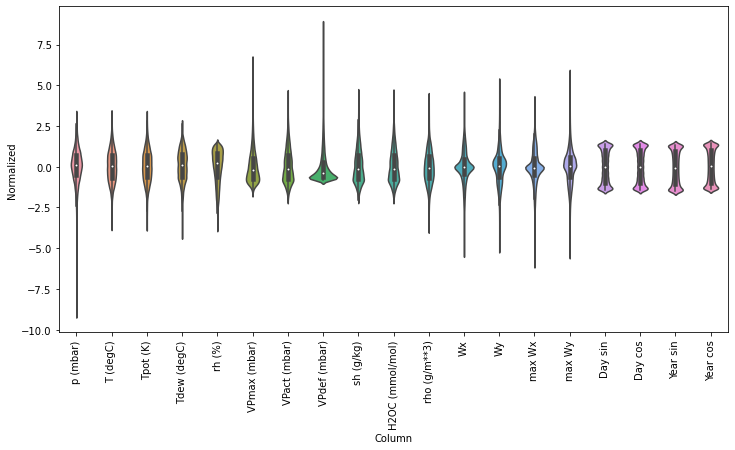

In [18]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)


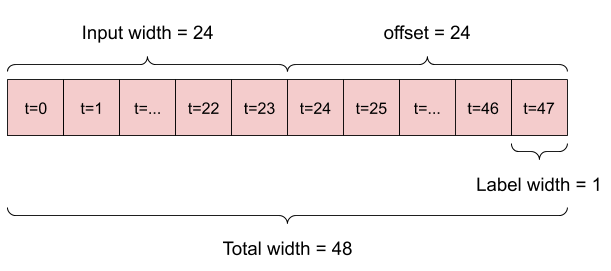 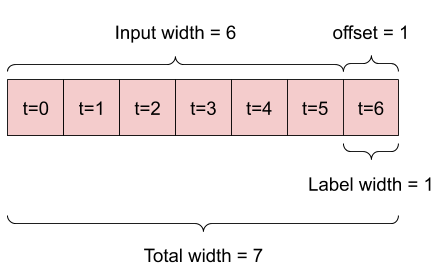

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [20]:
class WindowDataset(Dataset):
    """"""
    def __init__(self, dataframe, label_columns, input_width, label_width, shift):
        self.y = dataframe[label_columns]
        self.x = dataframe
            
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __len__(self):
        return len(self.y) // self.total_window_size
    
    def __getitem__(self, idx):
        return (
            self.x.iloc[self.input_indices + self.total_window_size*idx].values, 
            self.y.iloc[self.label_indices + self.total_window_size*idx].values,
        )
    
    def __repr__(self):
        # TODO: debug only
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.y.columns.values}'])


In [21]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.000047,1.414246,-0.062412,1.428455
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.366088,1.366061,-0.061389,1.428445
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,0.707185,1.224790,-0.060366,1.428434
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.000091,1.000059,-0.059343,1.428423
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.224845,0.707185,-0.058320,1.428411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.886564,1.571997,0.947972,0.776492,1.984916,-0.493604,1.979016,1.977352,-0.882480,-0.166720,-1.508412,-0.155728,-1.363530,-1.348771,0.425358,-0.853647,-1.155769
294359,0.266787,0.879473,0.853325,1.405624,0.621793,0.742703,1.680752,-0.283962,1.672043,1.672192,-0.822662,-0.824901,-0.641039,-0.704391,-0.475387,-1.192740,0.759931,-0.854504,-1.155220
294365,0.217374,0.740824,0.719224,1.425703,1.086900,0.559461,1.716396,-0.605690,1.709479,1.707403,-0.716211,-0.030746,0.645277,0.013960,0.600050,-0.955423,1.042724,-0.855361,-1.154670
294371,0.213759,0.710783,0.689423,1.412795,1.147303,0.521772,1.692633,-0.645127,1.687018,1.683929,-0.689842,0.014300,-0.102616,-0.095117,-0.198426,-0.652992,1.254466,-0.856218,-1.154119


In [22]:
val_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
294383,0.213759,0.618351,0.597730,1.321003,1.207707,0.407409,1.535799,-0.688716,1.526045,1.526654,-0.601703,0.072253,-0.639008,0.089478,-0.535618,0.061737,1.412901,-0.857930,-1.153016
294389,0.241478,0.545560,0.523229,1.260764,1.286231,0.321636,1.433619,-0.738532,1.424968,1.423369,-0.526259,0.071987,-0.233849,0.079109,-0.188724,0.425328,1.348797,-0.858786,-1.152463
294395,0.258351,0.510898,0.487698,1.249290,1.370796,0.282648,1.414609,-0.784197,1.406250,1.404590,-0.490612,-0.459268,0.629912,-0.526513,0.659056,0.759937,1.192783,-0.859641,-1.151910
294401,0.277634,0.487789,0.463629,1.227776,1.388917,0.256656,1.378964,-0.794575,1.368815,1.367032,-0.463755,-0.086355,-0.297434,-0.068182,-0.229261,1.042760,0.955491,-0.860496,-1.151357
294407,0.294506,0.502810,0.476236,1.255027,1.413079,0.273551,1.424114,-0.807029,1.413738,1.413979,-0.474987,-0.421783,0.109299,-0.413007,0.139150,1.254524,0.653093,-0.861350,-1.150802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378461,1.447871,-0.708058,-0.814346,-0.543525,0.585551,-0.751825,-0.683646,-0.603614,-0.701375,-0.701017,1.032666,1.972660,1.474668,1.879942,1.333168,-0.707090,-1.224544,1.260457,0.516992
378467,1.447871,-0.713835,-0.821223,-0.496195,0.730519,-0.755724,-0.645625,-0.643052,-0.667683,-0.665806,1.037061,1.683218,1.168334,1.824204,1.199236,-0.999996,-0.999813,1.260816,0.516049
378473,1.476795,-0.787781,-0.895723,-0.513406,0.929851,-0.798610,-0.659883,-0.699095,-0.678914,-0.679891,1.116167,1.865699,2.069800,1.642021,1.702072,-1.224751,-0.706939,1.261175,0.515105
378479,1.503309,-0.765828,-0.875092,-0.489023,0.917770,-0.785615,-0.640873,-0.694943,-0.660196,-0.661111,1.100053,1.818145,1.318900,1.568811,1.089944,-1.366037,-0.365879,1.261533,0.514161


In [23]:
BATCH_SIZE = 4

train_ds = WindowDataset(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowDataset(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [24]:
train_ds

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [25]:
for (inputs, label) in tqdm(train_loader):
    pass

100%|██████████| 6133/6133 [00:07<00:00, 778.42it/s]


In [26]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    break

torch.Size([4, 1, 19]) torch.Size([4, 1, 1])


## Single step models

In [27]:
loss = nn.MSELoss()

### Baseline

In [28]:
class Baseline(nn.Module):
    def __init__(self):
        super(Baseline, self).__init__()
        
    def forward(self, x):
        return x[:, -1, 1].reshape((x.shape[0], -1, 1))

In [29]:
baseline = Baseline()

In [30]:
for (inputs, label) in train_loader:
    out = baseline(inputs)
    print(out)
    break

tensor([[[-1.9825]],

        [[-2.0703]],

        [[-2.1650]],

        [[-2.1119]]], dtype=torch.float64)


In [31]:
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = baseline(inputs)
        running_loss += loss(out, label)  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.01313: 100%|██████████| 1753/1753 [00:02<00:00, 762.26it/s]


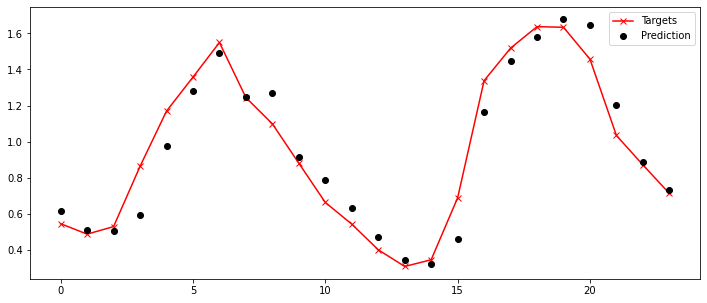

In [32]:
targets = []
outputs = []

for i in range(24):
    targets.append(float(val_ds[i][1].squeeze()))
    outputs.append(baseline(val_ds[i][0][None, :]).squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

### Linear model

In [33]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.dense = nn.Linear(19, 1)
        
    def forward(self, x):
        return self.dense(x)

linear = Linear()

In [34]:
for (inputs, label) in train_loader:
    out = linear(inputs.float())
    print(out)
    break

tensor([[[-0.2147]],

        [[-0.1048]],

        [[-0.0893]],

        [[-0.0659]]], grad_fn=<AddBackward0>)


  0%|          | 0/6133 [00:00<?, ?it/s]/home/khazit/Documents/ML/BatteryProbe.ai/.venv/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag
Epoch #3 - Loss = 0.00910: 100%|██████████| 6133/6133 [00:09<00:00, 675.20it/s]


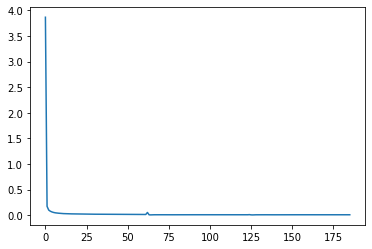

In [35]:
N_EPOCHS = 3

criterion = nn.MSELoss()
optimizer = optim.SGD(linear.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = linear(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

In [36]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = linear(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.01037: 100%|██████████| 1753/1753 [00:02<00:00, 830.11it/s]


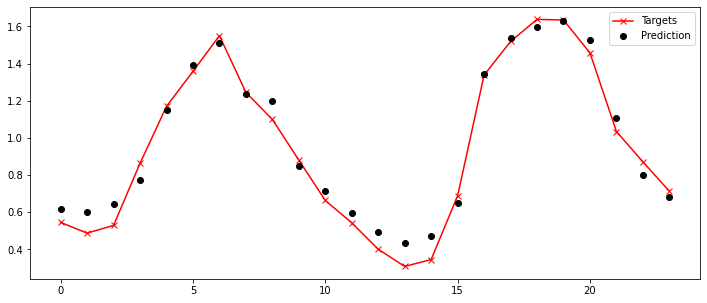

In [37]:
targets = []
outputs = []
for i in range(24):
    outputs.append(linear(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

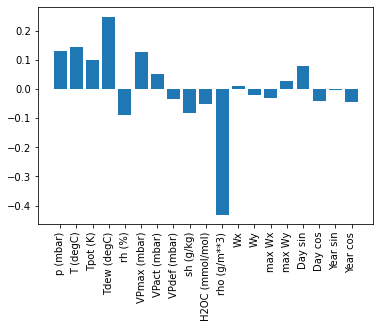

In [38]:
plt.bar(x = range(len(train_df.columns)),
        height=list(linear.parameters())[0].data.squeeze().numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

> Sometimes the model doesn't even place the most weight on the input T (degC). This is one of the risks of random initialization. 

### Dense

In [39]:
class Dense(nn.Module):
    def __init__(self):
        super(Dense, self).__init__()
        self.dense1 = nn.Linear(19, 64)
        self.dense2 = nn.Linear(64, 64)
        self.dense3 = nn.Linear(64, 1)
        
    def forward(self, x):
        res = self.dense1(x)
        res = F.relu(res)
        res = self.dense2(res)
        res = F.relu(res)
        return self.dense3(res)

dense = Dense()

for (inputs, label) in train_loader:
    out = dense(inputs.float())
    print(out)
    break

tensor([[[0.1808]],

        [[0.1875]],

        [[0.1901]],

        [[0.2620]]], grad_fn=<AddBackward0>)


Epoch #10 - Loss = 0.00726: 100%|██████████| 6133/6133 [00:12<00:00, 506.74it/s]


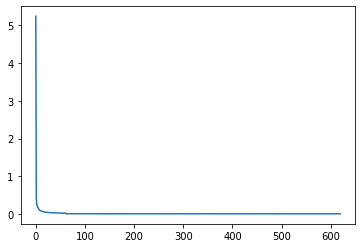

In [40]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.SGD(dense.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = dense(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

In [41]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = dense(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

Loss 0.00734: 100%|██████████| 1753/1753 [00:02<00:00, 775.32it/s]


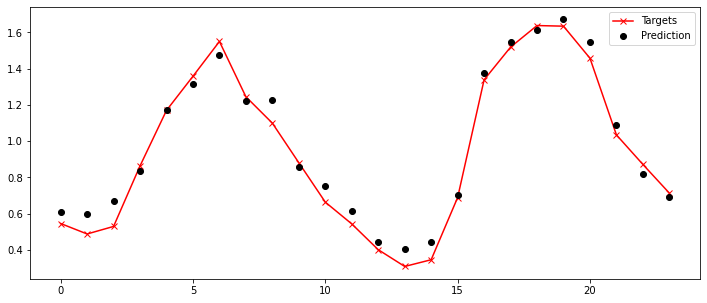

In [42]:
targets = []
outputs = []
for i in range(24):
    outputs.append(dense(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

### Multi-step dense (Peut être pas bon ?)

In [85]:
BATCH_SIZE = 4
N_TIMESTEPS = 3

train_ds = WindowDataset(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=N_TIMESTEPS, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowDataset(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=N_TIMESTEPS, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [86]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    break

torch.Size([4, 3, 19]) torch.Size([4, 1, 1])


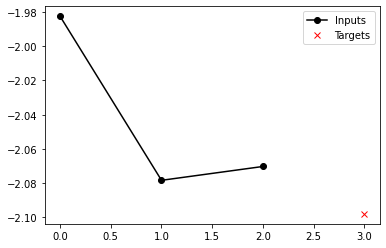

In [45]:
plt.plot(np.arange(0, N_TIMESTEPS, 1), train_ds[0][0][:, 1], "ko-", label="Inputs")
plt.plot(N_TIMESTEPS, train_ds[0][1], "rx", label="Targets")
plt.legend()
plt.show()

In [46]:
class MultiDense(nn.Module):
    def __init__(self, n_timesteps):
        super(MultiDense, self).__init__()
        self.dense1 = nn.Linear(19*n_timesteps, 32)
        self.dense2 = nn.Linear(32, 32)
        self.dense3 = nn.Linear(32, 1)
        
    def forward(self, x):
        res = x.reshape((x.shape[0], -1))
        res = self.dense1(res)
        res = F.relu(res)
        res = self.dense2(res)
        res = F.relu(res)
        return self.dense3(res)[:, None]

multidense = MultiDense(N_TIMESTEPS)

for (inputs, label) in train_loader:
    out = multidense(inputs.float())
    print(out)
    break

tensor([[[-0.1039]],

        [[-0.0783]],

        [[-0.0729]],

        [[-0.0523]]], grad_fn=<UnsqueezeBackward0>)


Epoch #5 - Loss = 0.00830: 100%|██████████| 3067/3067 [00:06<00:00, 501.31it/s]


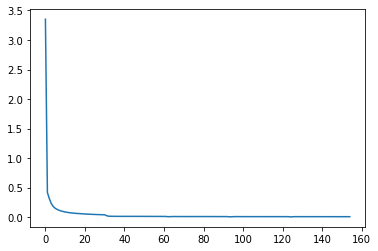

In [47]:
N_EPOCHS = 5

criterion = nn.MSELoss()
optimizer = optim.SGD(multidense.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = multidense(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

In [48]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = multidense(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = multidense(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, N_TIMESTEPS, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(N_TIMESTEPS, val_ds[i][1], "rx", label="Targets")
    plt.plot(N_TIMESTEPS, out, "bs", label="Prediction")
    plt.legend()
    plt.show()

Loss 0.00798: 100%|██████████| 876/876 [00:01<00:00, 605.49it/s]


### CNN 

In [87]:
class Conv(nn.Module):
    def __init__(self, n_timesteps):
        super(Conv, self).__init__()
        self.conv = nn.Conv1d(19, 32, (N_TIMESTEPS,))
        self.dense1 = nn.Linear(32, 32)
        self.dense2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)
        res = self.conv(x).squeeze()
        res = F.relu(res)
        res = self.dense1(res)
        res = F.relu(res)
        return self.dense2(res)[:, None]

conv = Conv(N_TIMESTEPS)

for (inputs, label) in train_loader:
    out = conv(inputs.float())
    print(out)
    break

tensor([[[-0.1504]],

        [[-0.2231]],

        [[-0.2886]],

        [[-0.0872]]], grad_fn=<UnsqueezeBackward0>)


Epoch #1 - Loss = 0.03593:  99%|█████████▉| 3047/3067 [00:07<00:00, 443.08it/s]/home/khazit/Documents/ML/BatteryProbe.ai/.venv/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #10 - Loss = 0.00709: 100%|██████████| 3067/3067 [00:07<00:00, 389.72it/s]


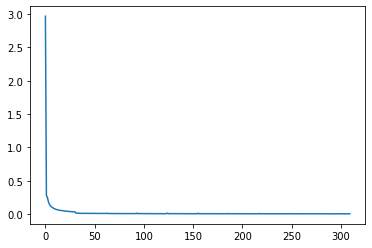

In [88]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.SGD(conv.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = conv(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

Loss 0.00757: 100%|██████████| 876/876 [00:01<00:00, 539.44it/s]


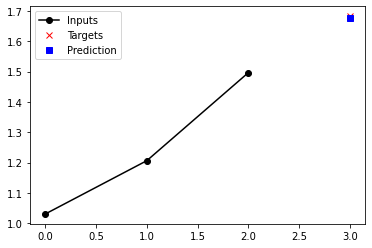

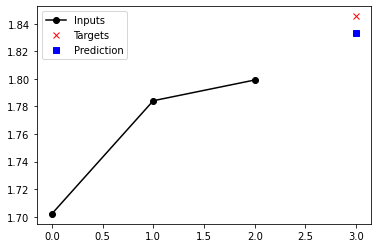

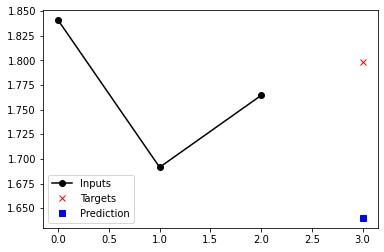

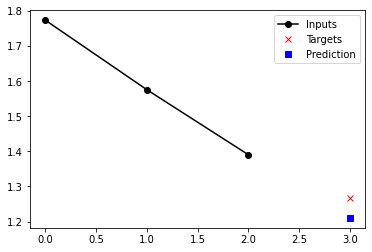

In [89]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = conv(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = conv(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, N_TIMESTEPS, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(N_TIMESTEPS, val_ds[i][1], "rx", label="Targets")
    plt.plot(N_TIMESTEPS, out, "bs", label="Prediction")
    plt.legend()
    plt.show()